In [ ]:
# Random Forests

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Load dataset
data = load_iris()
X, y = data.data, data.target
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy:{accuracy}')

Accuracy:1.0


In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)
y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5
print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [6]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
np.random.uniform(0, .7, n_0).tolist() +
np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5
print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7256
Confusion matrix
[[ 366  134]
 [2610 6890]]
class 0 accuracy: 0.732
class 1 accuracy: 0.7252631578947368


model 1 AUC score: 0.5
model 2 AUC score: 0.8496962105263157


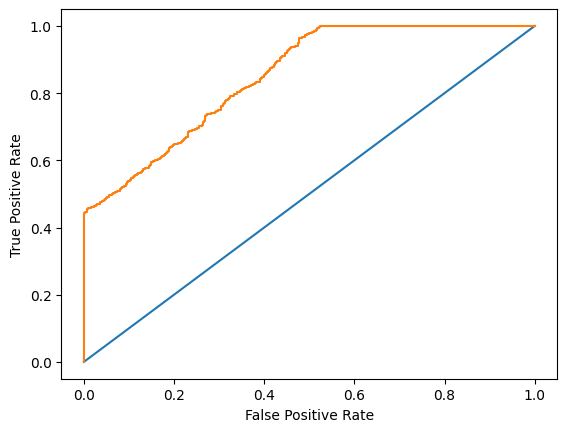

In [9]:
import matplotlib.pyplot as plt
def plot_roc_curve(true_y, y_prob): 
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

In [10]:
# Ateityje reiks pateikti

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
# Daugiau informacijos
# https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc 

In [12]:
# Panaudodami mašininį mokymąsi (linearRegression, Logistic, DecisionTree ...) 
# pateikite orų prognozę 24rioms valandoms į priekį. 
# Pritaikykite daugiau nei vieną ML algoritmą.
# Pateikite Modelių tikslumo įverčius. Pateikite Modelio prognozę, 
# LHMT tarnybos prognozę, o praėjus 24 valandoms - stebėjimų rezultatus, pagal kuriuos apskaičiuosite modelių tikslumus.

In [2]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# https://archyvas.meteo.lt/?station=vilniaus-ams&start_date=2024-12-23&end_date=2024-12-23&meteo-form=Rodyti

In [102]:
orai = pd.read_json('../../../weather_data.json')

In [103]:
orai.head()

,obs_time_utc,station_code,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code
0,2025-01-01 00:00:00,kauno-ams,3.1,-1.7,6.3,12.4,225,100,1011.9,90,0.0,cloudy
1,2025-01-01 01:00:00,kauno-ams,2.9,-2.0,6.6,10.9,222,100,1010.6,88,0.0,cloudy
2,2025-01-01 02:00:00,kauno-ams,2.8,-2.2,6.7,11.2,237,100,1009.7,86,0.0,cloudy
3,2025-01-01 03:00:00,kauno-ams,2.3,-2.9,6.7,12.9,265,100,1009.3,83,0.0,cloudy
4,2025-01-01 04:00:00,kauno-ams,2.0,-3.5,7.3,12.6,256,100,1008.6,83,0.0,cloudy


In [80]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

NameError: name 'X_train_s' is not defined

In [81]:
orai.columns

Index(['obs_time_utc', 'station_code', 'air_temperature',
       'feels_like_temperature', 'wind_speed', 'wind_gust', 'wind_direction',
       'cloud_cover', 'sea_level_pressure', 'relative_humidity',
       'precipitation', 'condition_code'],
      dtype='object')

In [121]:
df = orai

In [116]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df['obs_time_utc'] = pd.to_datetime(df['obs_time_utc'])
df = df.sort_values(by='obs_time_utc')

for i in range(1, 25):
    df[f'lag_{i}'] = df['air_temperature'].shift(i)
    
df = df.dropna()

X = df[[f'lag_{i}' for i in range(1, 25)]]
y = df['air_temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

future_lags = df['air_temperature'].iloc[-24:].values.reshape(1, -1)  
future_predictions = []

for _ in range(24):
    next_prediction = model.predict(future_lags)[0]
    future_predictions.append(next_prediction)
    future_lags = np.roll(future_lags, -1)
    future_lags[0, -1] = next_prediction

future_times = pd.date_range(start=df['obs_time_utc'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
forecast_df = pd.DataFrame({
    'obs_time_utc': future_times,
    'station_code': df['station_code'].iloc[0], 
    'air_temperature': future_predictions
})

result_df = pd.concat([df[['obs_time_utc', 'station_code', 'air_temperature']], forecast_df], ignore_index=True)
print(result_df[-24:])

result_df[-24:].to_csv('forecast_randomforests_only.csv', index=False)

          obs_time_utc station_code  air_temperature
43 2025-01-06 19:00:00    kauno-ams           -2.244
44 2025-01-06 20:00:00    kauno-ams           -2.300
45 2025-01-06 21:00:00    kauno-ams           -3.004
46 2025-01-06 22:00:00    kauno-ams           -3.065
47 2025-01-06 23:00:00    kauno-ams           -3.237
48 2025-01-07 00:00:00    kauno-ams           -3.509
49 2025-01-07 01:00:00    kauno-ams           -3.710
50 2025-01-07 02:00:00    kauno-ams           -3.791
51 2025-01-07 03:00:00    kauno-ams           -3.882
52 2025-01-07 04:00:00    kauno-ams           -3.926
53 2025-01-07 05:00:00    kauno-ams           -3.954
54 2025-01-07 06:00:00    kauno-ams           -3.901
55 2025-01-07 07:00:00    kauno-ams           -2.831
56 2025-01-07 08:00:00    kauno-ams           -2.461
57 2025-01-07 09:00:00    kauno-ams           -2.288
58 2025-01-07 10:00:00    kauno-ams           -2.245
59 2025-01-07 11:00:00    kauno-ams           -2.006
60 2025-01-07 12:00:00    kauno-ams           

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[[f'lag_{i}' for i in range(1, 25)]]
y = df['air_temperature']

df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

future_lags = df['air_temperature'].iloc[-24:].values.reshape(1, -1)
future_predictions = []

for _ in range(24):
    next_prediction = model.predict(future_lags)[0]
    future_predictions.append(next_prediction)
    future_lags = np.roll(future_lags, -1)
    future_lags[0, -1] = next_prediction

future_times = pd.date_range(start=df['obs_time_utc'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
forecast_df = pd.DataFrame({
    'obs_time_utc': future_times,
    'station_code': df['station_code'].iloc[0], 
    'air_temperature': future_predictions
})

result_df = pd.concat([df[['obs_time_utc', 'station_code', 'air_temperature']], forecast_df], ignore_index=True)
print(result_df)

result_df[-24:].to_csv('forecast_linear_only.csv', index=False)

          obs_time_utc station_code  air_temperature
0  2025-01-05 00:00:00    kauno-ams        -5.100000
1  2025-01-05 01:00:00    kauno-ams        -5.300000
2  2025-01-05 02:00:00    kauno-ams        -4.900000
3  2025-01-05 03:00:00    kauno-ams        -4.700000
4  2025-01-05 04:00:00    kauno-ams        -4.600000
..                 ...          ...              ...
62 2025-01-07 14:00:00    kauno-ams         0.388563
63 2025-01-07 15:00:00    kauno-ams        -3.275656
64 2025-01-07 16:00:00    kauno-ams         0.360469
65 2025-01-07 17:00:00    kauno-ams         0.429439
66 2025-01-07 18:00:00    kauno-ams        -3.811320

[67 rows x 3 columns]


In [118]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df['obs_time_utc'] = pd.to_datetime(df['obs_time_utc'])
df = df.sort_values(by='obs_time_utc')

X = df.drop(columns=['obs_time_utc', 'station_code', 'air_temperature', 'condition_code']) 
y = df['air_temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

future_data = X.iloc[-24:].copy() 
future_predictions = model.predict(future_data)

future_times = pd.date_range(start=df['obs_time_utc'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
forecast_df = pd.DataFrame({
    'obs_time_utc': future_times,
    'station_code': df['station_code'].iloc[0], 
    'air_temperature': future_predictions
})

result_df = pd.concat([df[['obs_time_utc', 'station_code', 'air_temperature']], forecast_df], ignore_index=True)
print(result_df)

result_df[-24:].to_csv('forecast_randomforests_all.csv', index=False)


          obs_time_utc station_code  air_temperature
0  2025-01-05 00:00:00    kauno-ams           -5.100
1  2025-01-05 01:00:00    kauno-ams           -5.300
2  2025-01-05 02:00:00    kauno-ams           -4.900
3  2025-01-05 03:00:00    kauno-ams           -4.700
4  2025-01-05 04:00:00    kauno-ams           -4.600
..                 ...          ...              ...
62 2025-01-07 14:00:00    kauno-ams           -2.881
63 2025-01-07 15:00:00    kauno-ams           -1.880
64 2025-01-07 16:00:00    kauno-ams           -1.779
65 2025-01-07 17:00:00    kauno-ams           -1.710
66 2025-01-07 18:00:00    kauno-ams           -1.685

[67 rows x 3 columns]


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df.drop(columns=['obs_time_utc', 'station_code', 'air_temperature', 'condition_code'])
y = df['air_temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

future_data = X.iloc[-24:].copy()
future_predictions = model.predict(future_data)

future_times = pd.date_range(start=df['obs_time_utc'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
forecast_df = pd.DataFrame({
    'obs_time_utc': future_times,
    'station_code': df['station_code'].iloc[0], 
    'air_temperature': future_predictions
})

result_df = pd.concat([df[['obs_time_utc', 'station_code', 'air_temperature']], forecast_df], ignore_index=True)
print(result_df)

result_df[-24:].to_csv('forecast_linear_all.csv', index=False)


           obs_time_utc station_code  air_temperature
0   2025-01-02 00:00:00    kauno-ams         5.000000
1   2025-01-02 01:00:00    kauno-ams         5.200000
2   2025-01-02 02:00:00    kauno-ams         5.600000
3   2025-01-02 03:00:00    kauno-ams         5.700000
4   2025-01-02 04:00:00    kauno-ams         6.200000
..                  ...          ...              ...
134 2025-01-07 14:00:00    kauno-ams        -1.588128
135 2025-01-07 15:00:00    kauno-ams        -0.785775
136 2025-01-07 16:00:00    kauno-ams        -0.426979
137 2025-01-07 17:00:00    kauno-ams        -0.194063
138 2025-01-07 18:00:00    kauno-ams         0.321885

[139 rows x 3 columns]


In [127]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(columns=['obs_time_utc', 'station_code', 'air_temperature', 'condition_code'])
y = df['air_temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

future_data = X.iloc[-24:].copy()
future_predictions = model.predict(future_data)

future_times = pd.date_range(start=df['obs_time_utc'].iloc[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
forecast_df = pd.DataFrame({
    'obs_time_utc': future_times,
    'station_code': df['station_code'].iloc[0], 
    'air_temperature': future_predictions
})

result_df = pd.concat([df[['obs_time_utc', 'station_code', 'air_temperature']], forecast_df], ignore_index=True)
print(result_df)

result_df[-24:].to_csv('forecast_decision_tree_all.csv', index=False)


           obs_time_utc station_code  air_temperature
0   2025-01-02 00:00:00    kauno-ams              5.0
1   2025-01-02 01:00:00    kauno-ams              5.2
2   2025-01-02 02:00:00    kauno-ams              5.6
3   2025-01-02 03:00:00    kauno-ams              5.7
4   2025-01-02 04:00:00    kauno-ams              6.2
..                  ...          ...              ...
134 2025-01-07 14:00:00    kauno-ams             -3.4
135 2025-01-07 15:00:00    kauno-ams             -1.7
136 2025-01-07 16:00:00    kauno-ams             -1.7
137 2025-01-07 17:00:00    kauno-ams             -0.5
138 2025-01-07 18:00:00    kauno-ams             -0.2

[139 rows x 3 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

df = orai

df['obs_time_utc'] = pd.to_datetime(df['obs_time_utc'])
df = df.sort_values(by='obs_time_utc')

lags = 24
for i in range(1, lags + 1):
    df[f'lag_{i}'] = df['air_temperature'].shift(i)

X = df[[f'lag_{i}' for i in range(1, lags + 1)]]
y = df['air_temperature']

df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

future_lags = df['air_temperature'].iloc[-lags:]
future_predictions = []

for _ in range(lags):
    next_prediction = model.predict(future_lags)[0]
    future_predictions.append(next_prediction)
    future_lags = np.roll(future_lags, -1)
    future_lags[0, -1] = next_prediction

future_times = pd.date_range(start=df['obs_time_utc'].iloc[-1] + pd.Timedelta(hours=1), periods=lags, freq='H')
forecast_df = pd.DataFrame({
    'obs_time_utc': future_times,
    'station_code': df['station_code'].iloc[0],
    'air_temperature': future_predictions
})

result_df = pd.concat([df[['obs_time_utc', 'station_code', 'air_temperature']], forecast_df], ignore_index=True)

print(result_df)
result_df[-lags:].to_csv('forecast_decision_tree_only.csv', index=False)

In [91]:
url = 'https://api.meteo.lt/v1/places/kaunas/forecasts/long-term'

page = requests.get(url)
status = page.status_code
print(status)

200


In [98]:
r = page.json()
n = r['forecastTimestamps']
df = pd.DataFrame(data=n)
df.head()

,forecastTimeUtc,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,totalPrecipitation,conditionCode
0,2025-01-06 17:00:00,0.2,-4.1,4,8,156,100,997,96,0.6,rain
1,2025-01-06 18:00:00,1.0,-3.1,4,7,164,100,997,96,0.3,light-rain
2,2025-01-06 19:00:00,1.7,-2.2,4,7,172,100,997,96,0.3,light-rain
3,2025-01-06 20:00:00,2.4,-1.4,4,7,179,100,997,95,0.3,light-rain
4,2025-01-06 21:00:00,2.7,-1.0,4,7,185,100,997,94,0.0,cloudy


In [99]:
df.to_csv('forecast_meteo.csv', index=False)

In [141]:
df1 = pd.read_csv('forecast_decision_tree_only.csv')
df2 = pd.read_csv('forecast_decision_tree_all.csv')
df3 = pd.read_csv('forecast_linear_only.csv')
df4 = pd.read_csv('forecast_linear_all.csv')
df5 = pd.read_csv('forecast_randomforests_only.csv')
df6 = pd.read_csv('forecast_randomforests_all.csv')
df7 = pd.read_csv('forecast_meteo_atrinkti.csv')

In [132]:
df8 = df7[2:26]

In [133]:
df8.to_csv('forecast_meteo_atrinkti.csv', index=False)

In [142]:
df1['temp_dto'] = df1['air_temperature']
df2['temp_dta'] = df2['air_temperature']
df3['temp_lo'] = df3['air_temperature']
df4['temp_la'] = df4['air_temperature']
df5['temp_rfo'] = df5['air_temperature']
df6['temp_rfa'] = df6['air_temperature']

In [143]:
df7['temp_meteo_prog'] = df7['airTemperature']
df7['obs_time_utc'] = df7['forecastTimeUtc']

In [146]:
df_group = pd.merge(df1[['obs_time_utc','temp_dto']],df2[['obs_time_utc','temp_dta']],on='obs_time_utc')
df_group = pd.merge(df_group,df3[['temp_lo','obs_time_utc']],on='obs_time_utc')
df_group = pd.merge(df_group,df4[['temp_la','obs_time_utc']],on='obs_time_utc')
df_group = pd.merge(df_group,df5[['temp_rfo','obs_time_utc']],on='obs_time_utc')
df_group = pd.merge(df_group,df6[['temp_rfa','obs_time_utc']],on='obs_time_utc')
df_group = pd.merge(df_group,df7[['temp_meteo_prog','obs_time_utc']],on='obs_time_utc')

In [147]:
df_group.to_csv('prognozės.csv', index=False)

In [6]:
df_group = pd.read_csv('prognozės.csv')

In [3]:
orai1 = pd.read_json('../../../weather_data1.json')

In [5]:
orai_f = orai1[19:43][['obs_time_utc', 'air_temperature']];orai_f

,obs_time_utc,air_temperature
19,2025-01-06 19:00:00,0.5
20,2025-01-06 20:00:00,1.0
21,2025-01-06 21:00:00,1.1
22,2025-01-06 22:00:00,2.0
23,2025-01-06 23:00:00,2.2
24,2025-01-07 00:00:00,2.4
25,2025-01-07 01:00:00,2.8
26,2025-01-07 02:00:00,3.5
27,2025-01-07 03:00:00,3.9
28,2025-01-07 04:00:00,3.2


In [10]:
orai_f['faktas'] = orai_f['air_temperature']
orai_fct = orai_f[['obs_time_utc', 'faktas']]

In [11]:
df_group = pd.merge(df_group,orai_fct,on='obs_time_utc')

In [13]:
df_group.to_csv('prognozė_ir_faktas.csv', index=False)

In [14]:
import seaborn as sns


<Axes: >

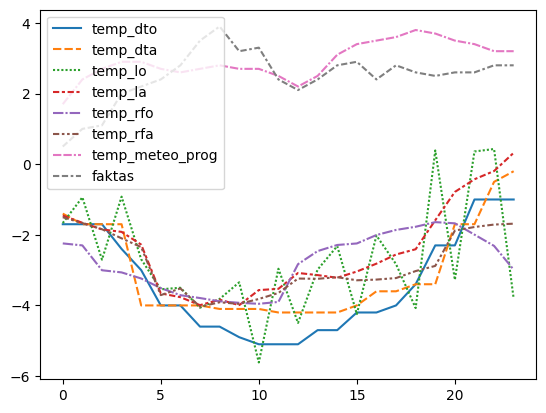

In [15]:
sns.lineplot(data=df_group)

In [ ]:
df_group